# Часть 1

In [599]:
import random as rnd
import time as tm
import matplotlib.pyplot as plt
import math

In [600]:
def time_decorator(foo):
    def decorator(n):
        time_start = tm.perf_counter_ns()
        result = foo(n)
        time_end = tm.perf_counter_ns()
        return time_end - time_start
    return decorator

In [601]:
#алгоритм сортировки пузырьком: сложность n^2
@time_decorator
def bubble_sort(n_array):
    sorted = False
    while sorted == False:
        sorted = True
        for i in range(len(n_array)-1):
            if n_array[i] > n_array[i+1]:
                c = n_array[i]
                n_array[i] = n_array[i+1]
                n_array[i+1] = c
                sorted = False
                
    return n_array

In [602]:
#алгоритм посчета уникальных элементов: сложность n
@time_decorator
def unic_elem(n_array):
    unic_elems = []
    for i in n_array:
        if i in unic_elems:
            continue
        else:
            unic_elems.append(i)
    return len(unic_elems)

In [603]:
#сортировка слиянием: сложность nlogn
def merge_time(array):
    start_time = tm.perf_counter_ns()
    def merges(array):
            new_array = list(array)
            for i in range(len(new_array)):
                new_array[i] = min(array)
                array.remove(min(array))
            return new_array

    def merge_sort(n_array):
        if len(n_array) == 2:
            if n_array[0] > n_array[1]:
                return list([n_array[1], n_array[0]])
            else:
                return n_array
        if len(n_array) <= 1:
            return n_array
        return merges(merge_sort(n_array[0:int(len(n_array)/2)]) + merge_sort(n_array[int(len(n_array)/2):]))
    
    merge_sort(array)
    return tm.perf_counter_ns() - start_time

In [604]:
n_count = [1, 2, 5, 7, 10, 15, 20, 30, 50, 70, 100, 150]

n_bubble_sort_time = []
n_unic_elem_time = []
n_merge_sort_time = []

for i in range(len(n_count)):
    n_bubble_sort_time.append((bubble_sort([rnd.randint(0, 100) for i in range(n_count[i])]))/10**2.1)
    n_unic_elem_time.append((unic_elem([rnd.randint(0, 100) for i in range(n_count[i])]))/10**2.5)
    n_merge_sort_time.append((merge_time([rnd.randint(0, 100) for i in range(n_count[i])]))/10**3)

In [605]:
bubble_sort_graph = []
unic_elem_graph = []
merge_sort_graph = []

for n in range(len(n_count)):
    bubble_sort_graph.append(n_count[n]**2)
    unic_elem_graph.append(n_count[n])
    merge_sort_graph.append(n_count[n]*math.log(n_count[n], 2))

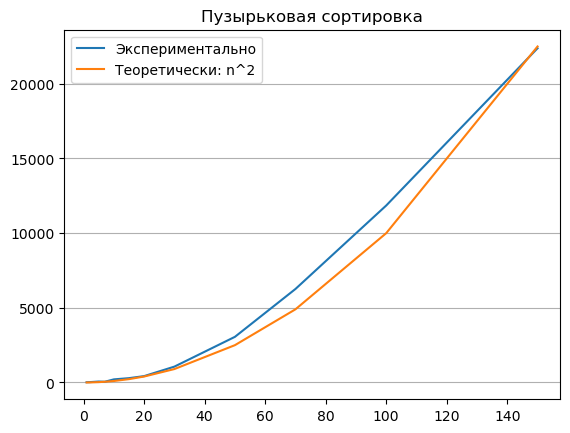

In [606]:
expirements = plt.plot(n_count, n_bubble_sort_time, label = 'Экспериментально')
hypothesis = plt.plot(n_count, bubble_sort_graph, label = 'Теоретически: n^2')
plt.title('Пузырьковая сортировка')
plt.grid(axis='y')
plt.legend()
plt.show()

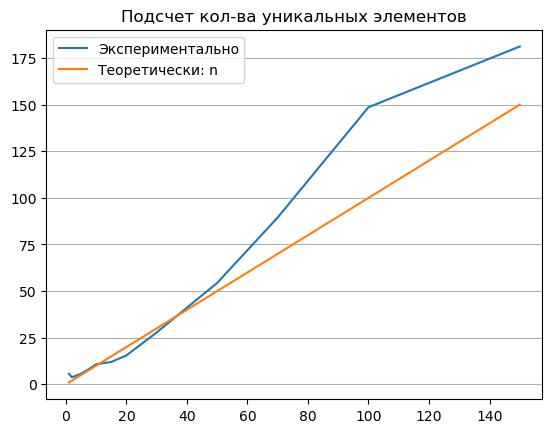

In [607]:
expirements = plt.plot(n_count, n_unic_elem_time, label = 'Экспериментально')
hypothesis = plt.plot(n_count, unic_elem_graph, label = 'Теоретически: n')
plt.title('Подсчет кол-ва уникальных элементов')
plt.grid(axis='y')
plt.legend()
plt.show()

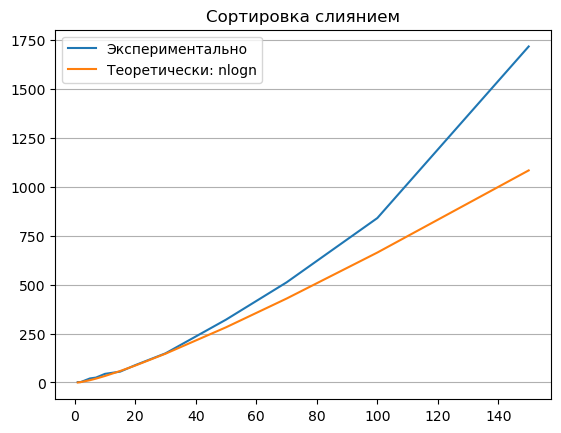

In [608]:
expirements = plt.plot(n_count, n_merge_sort_time, label = 'Экспериментально')
hypothesis = plt.plot(n_count, merge_sort_graph, label = 'Теоретически: nlogn')
plt.title('Сортировка слиянием')
plt.grid(axis='y')
plt.legend()
plt.show()

# Часть 2

Моя реализация сортировки: N = 5 

In [609]:
print(bubble_sort([i for i in range(5)])) # Лучший случай - уже отсортированный массив
print(bubble_sort([rnd.randint(0,100) for i in range(5)])) # Средний случай - отсортирован в случайном порядке
print(bubble_sort([i for i in range(5, 0, -1)])) # Худший случай - отсортирован в обратном порядке

print(merge_time([i for i in range(5)])) # Худший случай - уже отсортированный массив
print(merge_time([rnd.randint(0,100) for i in range(5)])) # Средний случай - отсортирован в случайном порядке
print(merge_time([i for i in range(5, 0, -1)])) # Лучший случай - отсортирован в обратном порядке

4100
5400
7800
18600
13900
13300


Моя реализация сортировки: N = 50

In [610]:
print(bubble_sort([i for i in range(50)])) # Лучший случай - уже отсортированный массив
print(bubble_sort([rnd.randint(0,100) for i in range(50)])) # Средний случай - отсортирован в случайном порядке
print(bubble_sort([i for i in range(50, 0, -1)])) # Худший случай - отсортирован в обратном порядке

print(merge_time([i for i in range(50)])) # Лучший случай - уже отсортированный массив
print(merge_time([rnd.randint(0,100) for i in range(50)])) # Средний случай - отсортирован в случайном порядке
print(merge_time([i for i in range(50, 0, -1)])) # Худший случай - отсортирован в обратном порядке

8300
403500
563500
313800
335200
331100


Моя реализация сортировки: N = 5000

In [611]:
print(bubble_sort([i for i in range(5000)])) # Лучший случай - уже отсортированный массив
print(bubble_sort([rnd.randint(0,100) for i in range(5000)])) # Средний случай - отсортирован в случайном порядке
print(bubble_sort([i for i in range(5000, 0, -1)])) # Худший случай - отсортирован в обратном порядке

print(merge_time([i for i in range(5000)])) # Худший случай - уже отсортированный массив
print(merge_time([rnd.randint(0,100) for i in range(5000)])) # Средний случай - отсортирован в случайном порядке
print(merge_time([i for i in range(5000, 0, -1)])) # Лучший случай - отсортирован в обратном порядке

712500
4079070400
5344733600
679020500
754550700
831770800


Готовая реализация сортировки: N = 5 

In [612]:
array = [i for i in range(5)] # Худший случай - уже отсортированный массив
start_time = tm.perf_counter_ns()
sorted(array)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

array1 = [rnd.randint(0,100) for i in range(5)] # Средний случай - отсортирован в случайном порядке
start_time = tm.perf_counter_ns()
sorted(array1)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

array2 = [i for i in range(5, 0, -1)] # Лучший случай - отсортирован в обратном порядке
start_time = tm.perf_counter_ns()
sorted(array2)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

52400
44600
52200


Готовая реализация сортировки: N = 50

In [613]:
array = [i for i in range(50)] # Худший случай - уже отсортированный массив
start_time = tm.perf_counter_ns()
sorted(array)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

array1 = [rnd.randint(0,100) for i in range(50)] # Средний случай - отсортирован в случайном порядке
start_time = tm.perf_counter_ns()
sorted(array1)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

array2 = [i for i in range(50, 0, -1)] # Лучший случай - отсортирован в обратном порядке
start_time = tm.perf_counter_ns()
sorted(array2)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

81900
44900
42400


Готовая реализация сортировки: N = 5000

In [616]:
array = [i for i in range(5000)] # Средний случай - уже отсортированный массив
start_time = tm.perf_counter_ns()
sorted(array)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

array1 = [rnd.randint(0,100) for i in range(5000)] # Худший случай - отсортирован в случайном порядке
start_time = tm.perf_counter_ns()
sorted(array1)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

array2 = [i for i in range(5000, 0, -1)] # Лучший случай - отсортирован в обратном порядке
start_time = tm.perf_counter_ns()
sorted(array2)
end_time = tm.perf_counter_ns()
print(end_time - start_time) 

95900
424300
82900
